In [28]:
from jaxstar import mistfit
from jax import random
import arviz, corner
import pandas as pd

In [29]:
%matplotlib inline

In [30]:
mf = mistfit.MistFit()

In [31]:
# d = pd.read_csv("isoinput_hall.csv")
# _d = d.iloc[0]
# kmag_obs, kmag_err, teff_obs, feh_obs, parallax_obs, parallax_err = np.array(_d[['kmagcorr', 'kmagcorr_err', 'teff', 'feh', 'parallax', 'parallax_err']]).astype(float)

In [32]:
# observed Kmag, Teff, Fe/H, parallax
kmag_obs, kmag_err, teff_obs, feh_obs, parallax_obs, parallax_err\
= [ 8.84300000e+00,  1.40000000e-02,  5.71900000e+03, -1.20000000e-01, 7.27355841e+00,  3.00812913e-02]
teff_err, feh_err = 110, 0.1

In [33]:
mf.set_data(['kmag', 'teff', 'feh', 'parallax'],\
            [kmag_obs, teff_obs, feh_obs, parallax_obs],\
            [kmag_err, teff_err, feh_err, parallax_err])

In [34]:
# setup HMC
ns = 20000
mf.setup_hmc(num_warmup=ns, num_samples=ns)

In [35]:
# run
rng_key = random.PRNGKey(0)
mf.run_hmc(rng_key, linear_age=True, flat_age_marginal=False, nodata=False)

sample: 100%|████████████████████████████████████████████| 40000/40000 [00:18<00:00, 2201.81it/s, 127 steps of size 1.73e-02. acc. prob=0.97]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
       age      9.45      2.66      9.76      5.72     13.78   4725.44      1.00
  distance      0.14      0.00      0.14      0.14      0.14   8880.38      1.00
       eep    399.66     18.05    404.56    374.39    422.09   3972.46      1.00
       feh     -0.08      0.09     -0.08     -0.23      0.07   6977.24      1.00

Number of divergences: 3


In [36]:
mcmc = mf.mcmc
samples = mf.samples

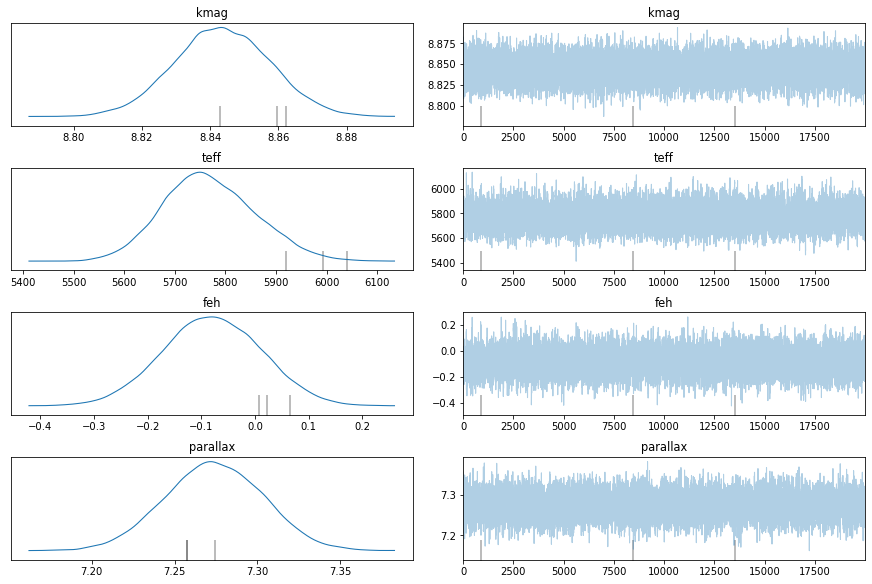

In [37]:
# trace plot
fig = arviz.plot_trace(mcmc, var_names=mf.obskeys)

In [38]:
# keys and observed values for corner plot
outkeys = mf.obskeys + ['mass', 'radius', 'age', 'eep']
obsvals = mf.obsvals + [None] * 4

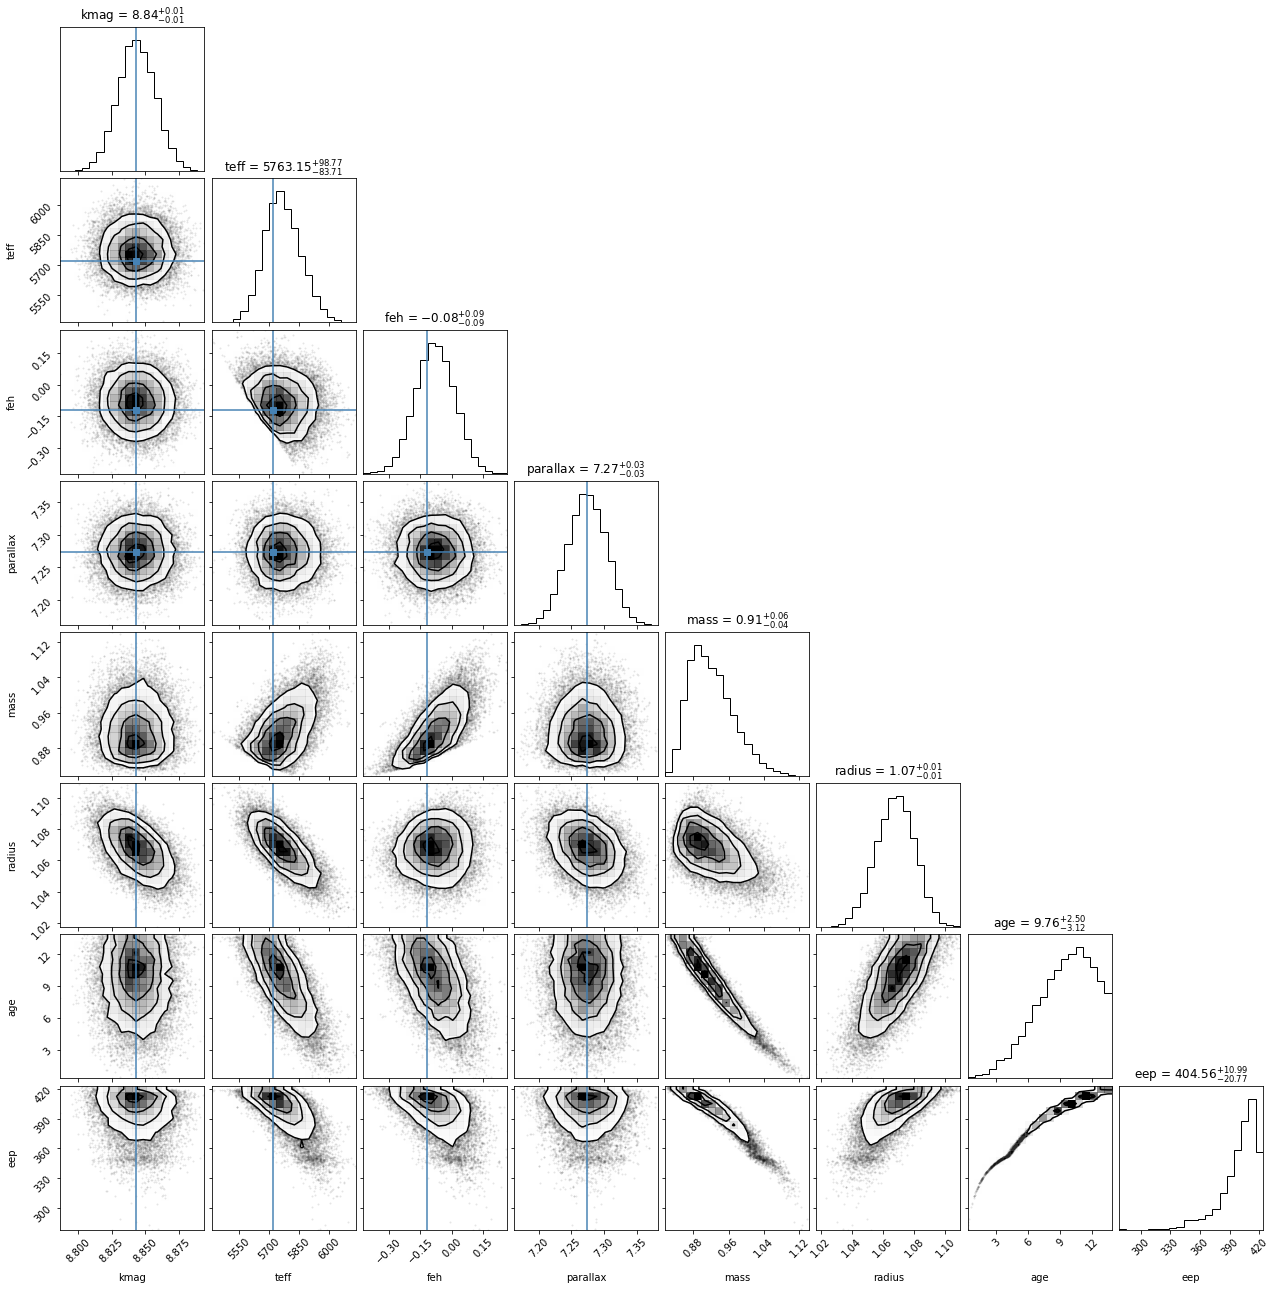

In [39]:
params = pd.DataFrame(data=dict(zip(outkeys, [samples[k] for k in outkeys])))
fig = corner.corner(params, show_titles="%.2f", truths=obsvals)